# Import thư viện cần thiết

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [21]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

Đọc dữ liệu

In [22]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,False
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,False


In [23]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,rez_esc-missing
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,0,16,9,0,1,2.25,0.25,272.25,16,False
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,256,1681,9,0,1,2.25,0.25,272.25,1681,False
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,289,1681,9,0,1,2.25,0.25,272.25,1681,False
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,False
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,121,324,1,0,1,0.25,64.00,NaN,324,True


In [24]:
all_data = pd.concat((train, test)).reset_index(drop=True)

# Khám phá dữ liệu

In [25]:
dict_target = { 1 :'Extreme',
                2 :'Moderate',
                3 :'Vulnerable ',
                4 :'Non vulnerable'}

cols = train.columns

# hàm tạo các df dựa trên key word 
def crearte_df(train, keyword, cols_name):
    cols = train.columns
    keyword_cols = cols[train.columns.str.contains(keyword)].tolist()
    name = cols_name
    keyword_df = pd.concat([train[keyword_cols], train['Target']],axis=1)
    keyword_df.columns = name
    keyword_df = keyword_df.groupby('Target').sum()
    return keyword_df


# plot bar and pie
def plot_bar_and_pie(df, title_bar, xlabel_bar,ylabel_bar,
                     title_pie):
    df_T = df.T
    key = [0,1,2,3]
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    # Bar chart
    df.plot.bar(ax=ax[0])
    ax[0].set_title(title_bar)
    ax[0].set_xlabel(xlabel_bar)
    ax[0].set_ylabel(ylabel_bar)
    ax[0].set_yscale('log')
    ax[0].set_xticks(key, list(dict_target.values()), rotation=0)
    
    
    # Pie chart
    ax[1].pie(df_T.sum(axis=1), autopct='%1.1f%%')
    ax[1].set_title(title_pie)
    ax[1].legend(df_T.sum(axis=1).index)
    
    plt.tight_layout()
    plt.show()


### toilet

In [26]:
dict_target = { 1 :'Extreme',
                2 :'Moderate',
                3 :'Vulnerable ',
                4 :'Non vulnerable'}

cols = train.columns

cols_name = ['No Toilet', 'Sewer/Cesspool', 'Septic Tank','Black Hole/Letrine', 'Other', 'Target']
sani_df = crearte_df(all_data, 'sanitario', cols_name)
sani_df

,No Toilet,Sewer/Cesspool,Septic Tank,Black Hole/Letrine,Other
Target,,,,,
1.0,2,100,497,24,1
2.0,6,223,1054,31,10
3.0,4,134,909,25,0
4.0,9,1420,4132,22,5


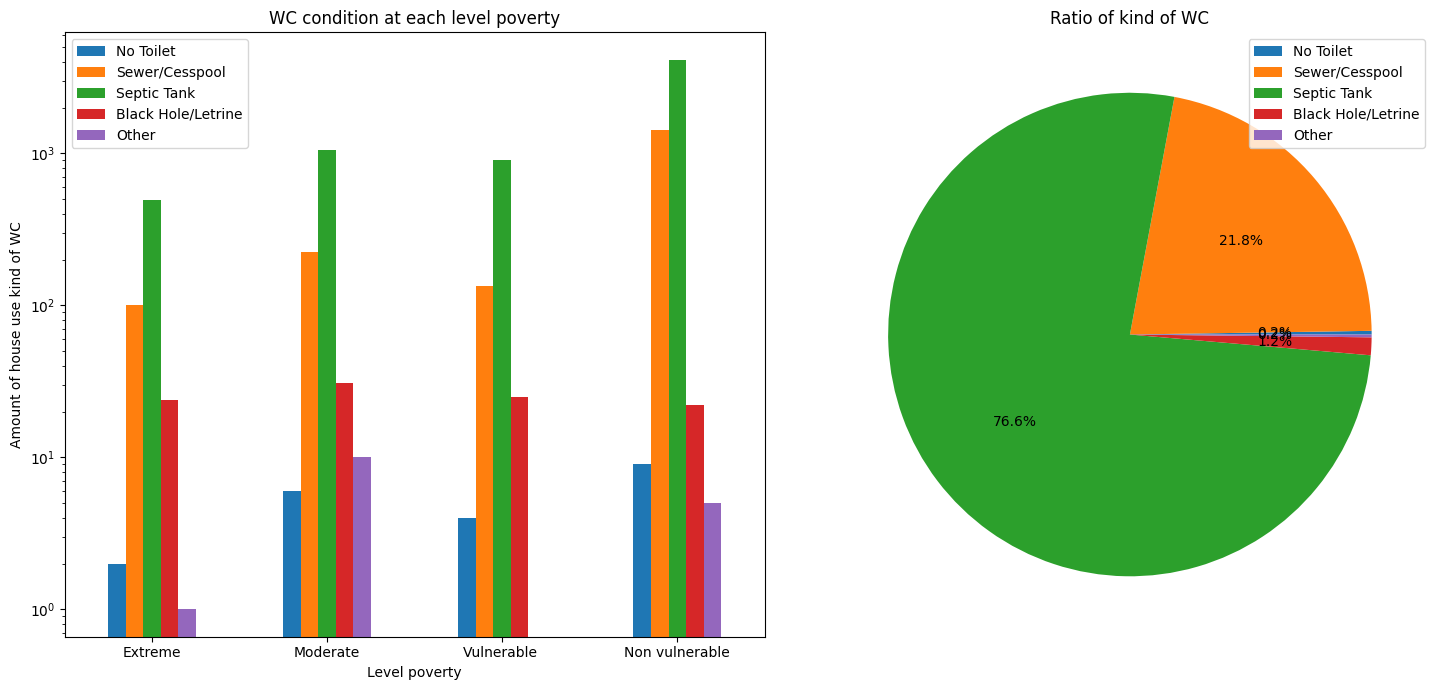

In [27]:
plot_bar_and_pie(sani_df,
                 'WC condition at each level poverty', 
                 'Level poverty',
                 'Amount of house use kind of WC',
                 'Ratio of kind of WC')


In [28]:
cols_name = ['No Enegry', 'Electric', 'Gas','Wood charcoal', 'Target']
enegry_df = crearte_df(all_data, 'energcocinar', cols_name)
enegry_df

,No Enegry,Electric,Gas,Wood charcoal
Target,,,,
1.0,5,211,329,79
2.0,1,543,667,113
3.0,3,461,539,69
4.0,4,3087,2361,136


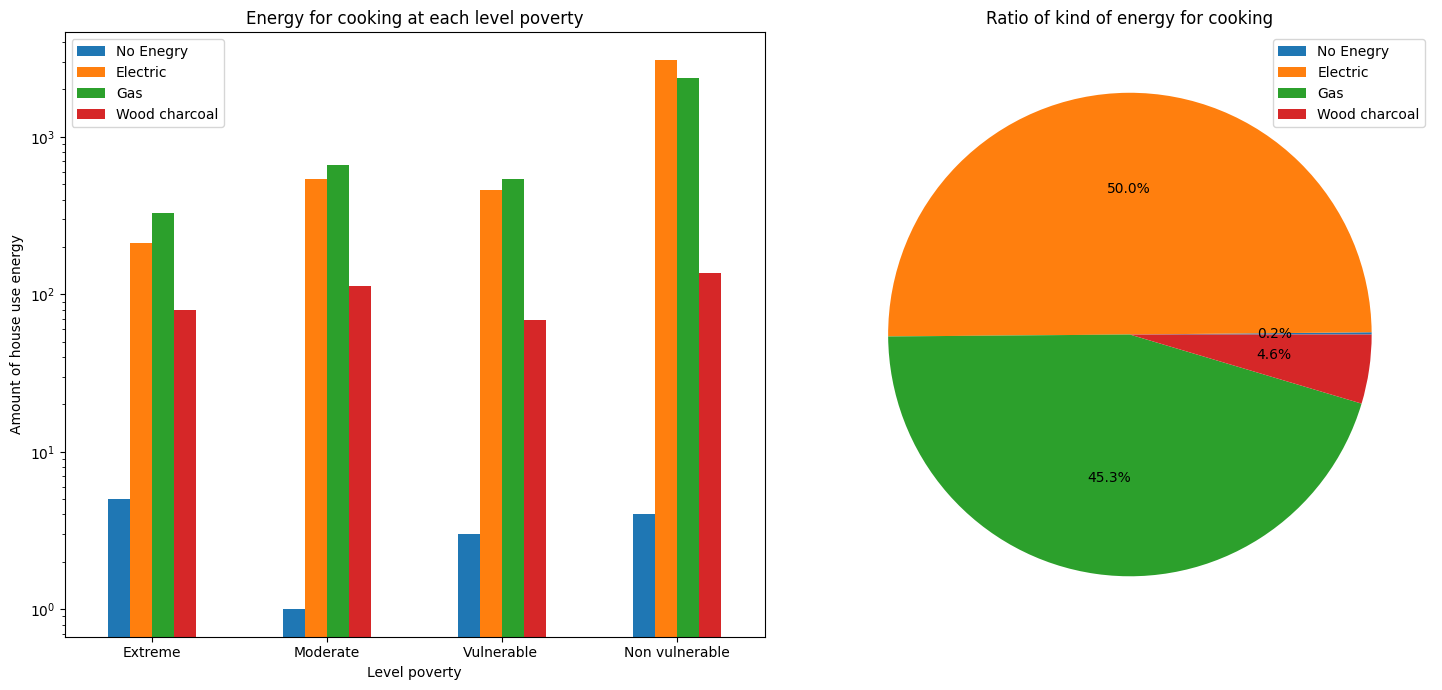

In [29]:
plot_bar_and_pie(enegry_df,
                 'Energy for cooking at each level poverty', 
                 'Level poverty',
                 'Amount of house use energy',
                 'Ratio of kind of energy for cooking')


In [30]:
cols_name = ['Tanker Truck', 'Botan hollow/Buried', 'Burn','Throw to space','To river/sea', 'Other', 'Target']
elimbasu_df= crearte_df(all_data, 'elimbasu', cols_name)
elimbasu_df

,Tanker Truck,Botan hollow/Buried,Burn,Throw to space,To river/sea,Other
Target,,,,,,
1.0,514,31,79,0,0,0
2.0,1047,70,197,10,0,0
3.0,904,24,144,0,0,0
4.0,5195,105,279,0,0,9


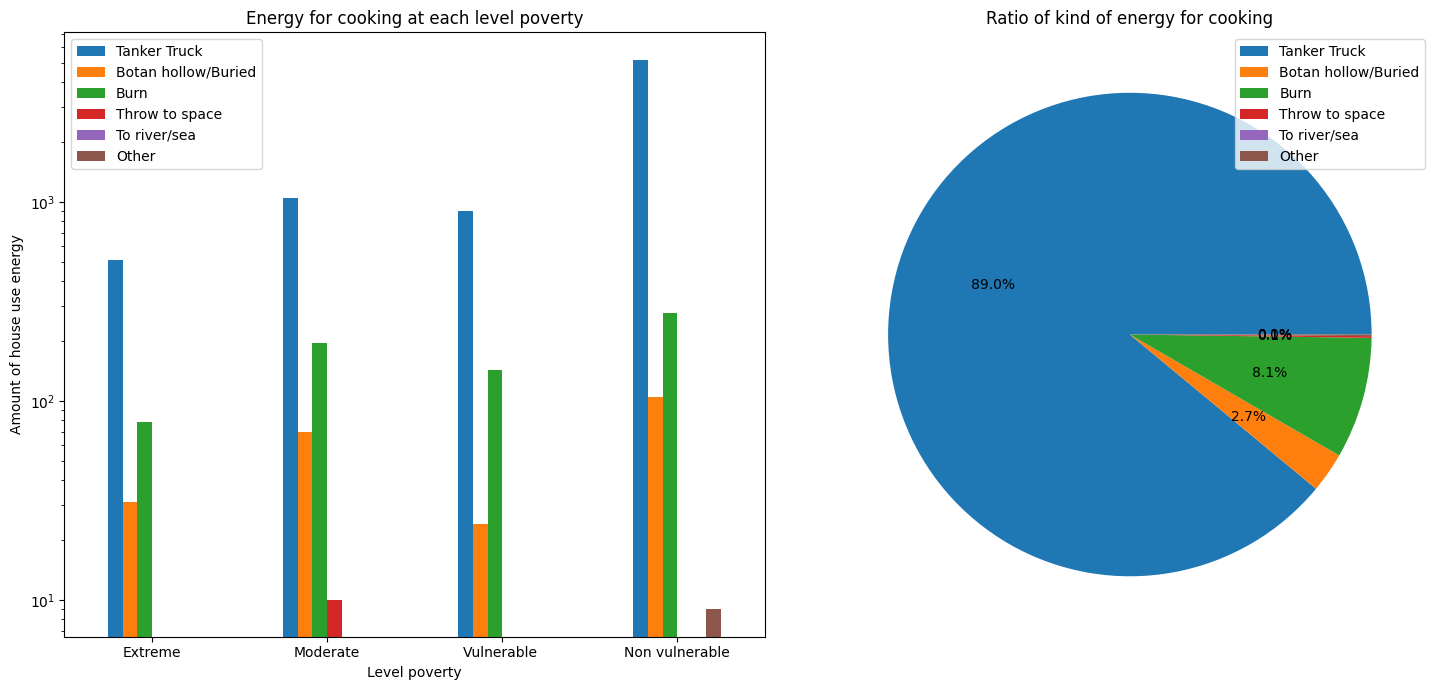

In [31]:
plot_bar_and_pie(elimbasu_df,
                 'Energy for cooking at each level poverty', 
                 'Level poverty',
                 'Amount of house use energy',
                 'Ratio of kind of energy for cooking')

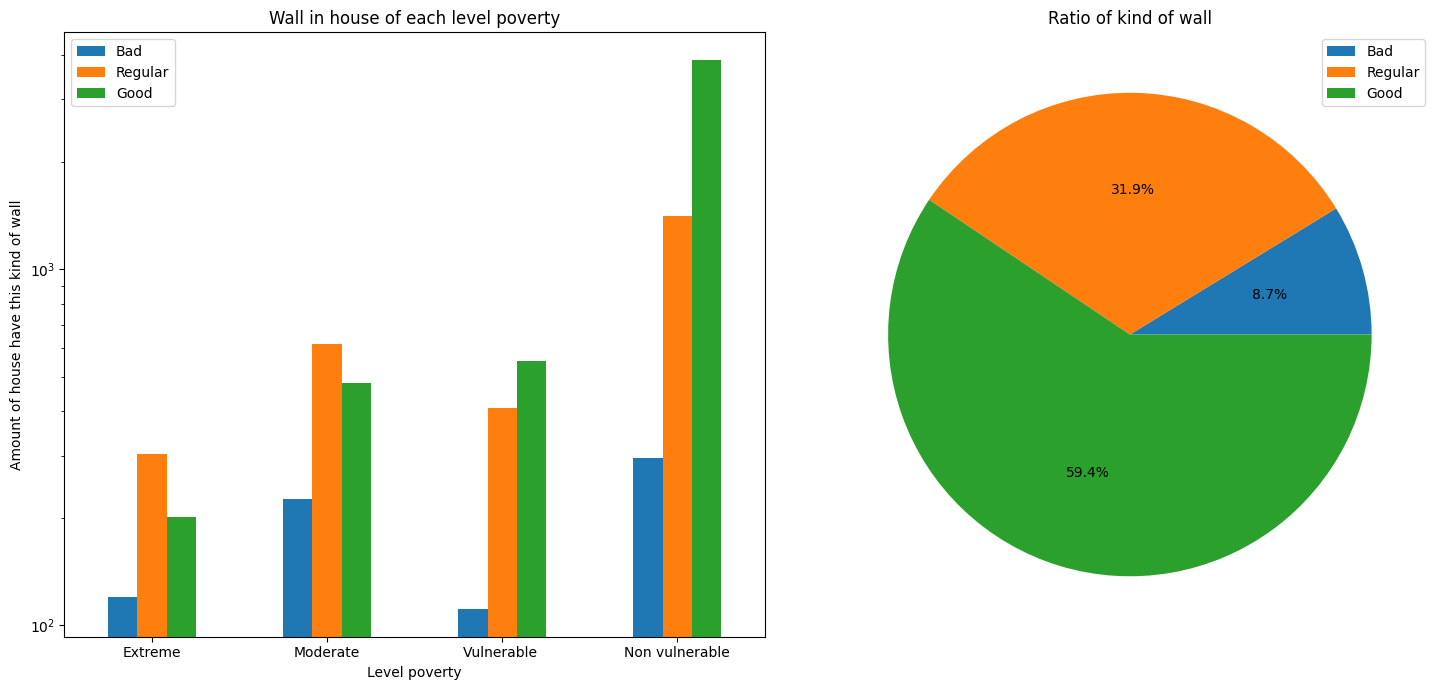

In [32]:
cols_name = ['Bad', 'Regular', 'Good','Target']
epared_df= crearte_df(all_data, 'epared', cols_name)
epared_df

plot_bar_and_pie(epared_df,
                 'Wall in house of each level poverty', 
                 'Level poverty',
                 'Amount of house have this kind of wall',
                 'Ratio of kind of wall')

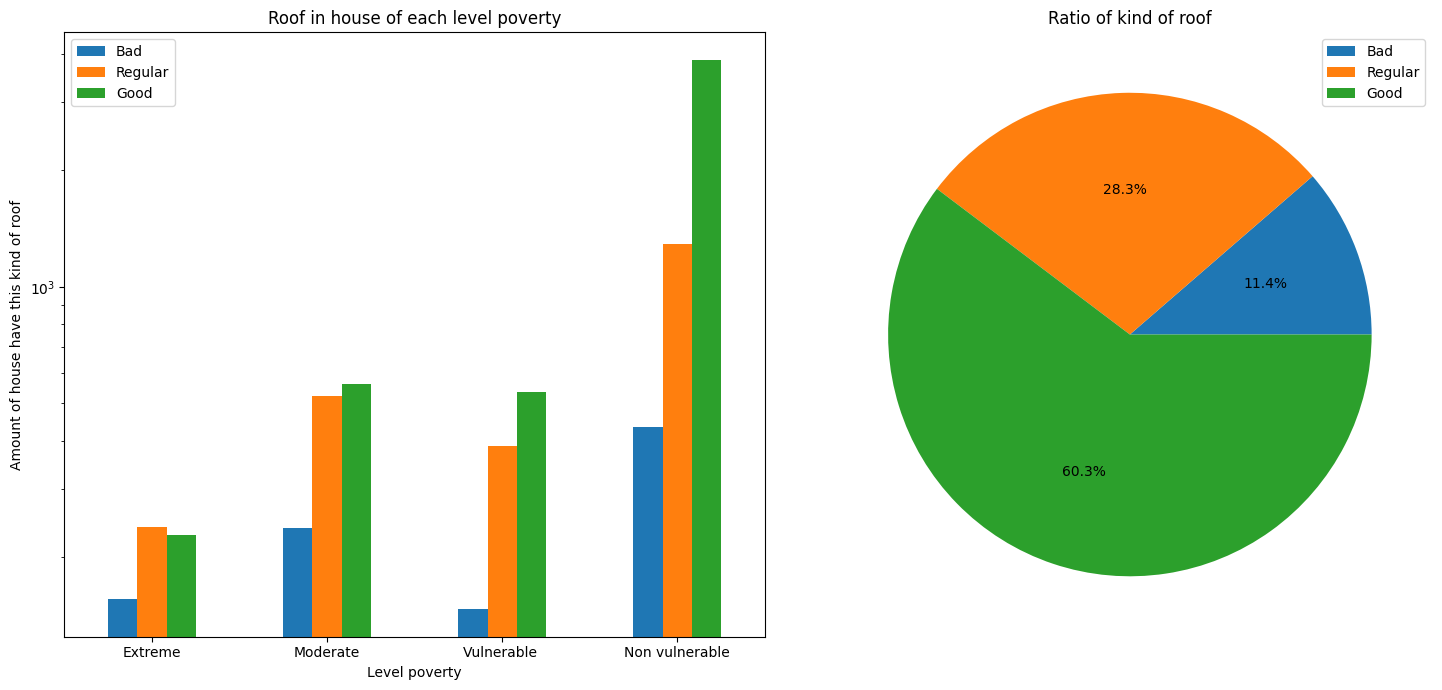

In [33]:
cols_name = ['Bad', 'Regular', 'Good','Target']
etecho_df= crearte_df(all_data, 'etecho', cols_name)
etecho_df

plot_bar_and_pie(etecho_df,
                 'Roof in house of each level poverty', 
                 'Level poverty',
                 'Amount of house have this kind of roof',
                 'Ratio of kind of roof')

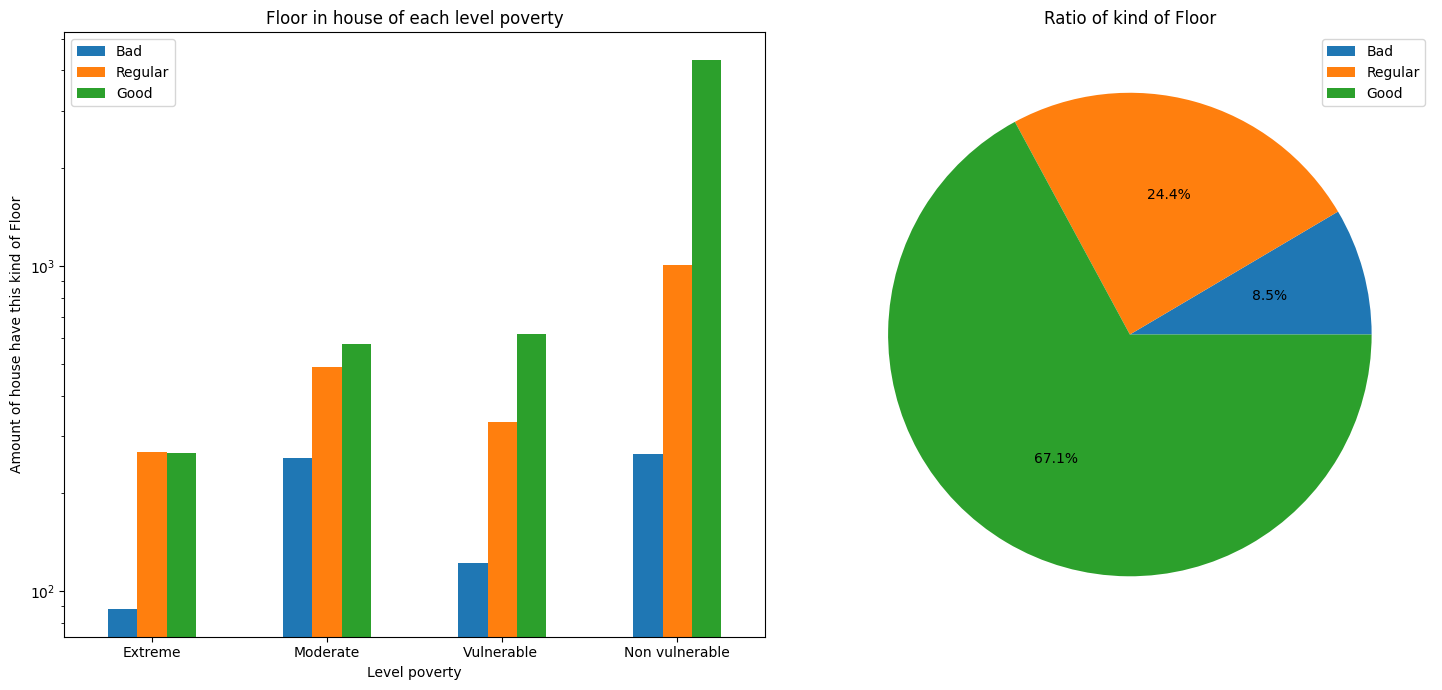

In [34]:
cols_name = ['Bad', 'Regular', 'Good','Target']
eviv_df= crearte_df(all_data, 'eviv', cols_name)
eviv_df

plot_bar_and_pie(eviv_df,
                 'Floor in house of each level poverty', 
                 'Level poverty',
                 'Amount of house have this kind of Floor',
                 'Ratio of kind of Floor')
